# Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

# Loding Data

In [2]:
data = pd.read_csv('application_record.csv')

In [3]:
#Read data
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


## Information of data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

## Statistical Inforamation

In [5]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


# Cheching the Categorical and Numerical Value

In [6]:
cat = []
num=[]

for col in data.columns:
    if data[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)
        
print("Categorical Column==\n",cat,"Numerical columns==\n",num)

Categorical Column==
 ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'] Numerical columns==
 ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS']


In [7]:
data[cat].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff


# Checking the missing values

In [8]:
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:>

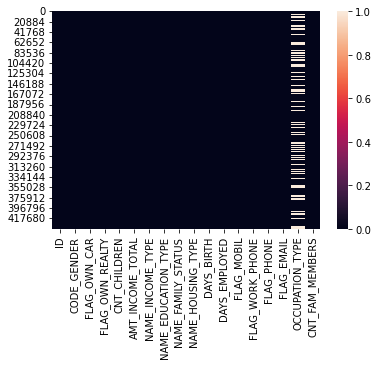

In [9]:
#Missing Value using Visualising Technique
sns.heatmap(data.isnull())

In [10]:
# cat = data.select_dtypes(include=['object']).columns.values
# cat

In [11]:
data[cat]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
1,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,NaN
2,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
3,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
...,...,...,...,...,...,...,...,...
438552,M,N,Y,Pensioner,Secondary / secondary special,Separated,House / apartment,NaN
438553,F,N,N,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers
438554,F,N,N,Commercial associate,Higher education,Single / not married,With parents,Sales staff
438555,F,N,Y,Pensioner,Secondary / secondary special,Married,House / apartment,NaN


# Missing Value Imputation

In [12]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.impute import SimpleImputer
# sm = SimpleImputer(strategy='constant',fill_value='missing')
# data['OCCUPATION_TYPE']=sm.fit_transform(data[cat],)


data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [13]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [14]:
data.shape

(438557, 18)

# Convert Days_Births and Days_Employed in Positive

In [15]:
# data['DAYS_BIRTH'] = data['DAYS_BIRTH'].values.replace('-',' ')
# data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].replace('-',' ')

In [16]:
# data.head()

# Drop duplicate Value

In [17]:
data.shape

(438557, 18)

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(438557, 18)

# Checking Unique Value of each Categorical Value

In [20]:
for col in data.columns.values:
    if data[col].dtype =='object':
        print(col,"==\n",data[col].value_counts())

CODE_GENDER ==
 F    294440
M    144117
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR ==
 N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY ==
 Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64
NAME_INCOME_TYPE ==
 Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE ==
 Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64
NAME_FAMILY_STATUS ==
 Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64
NAME_HOUSING_TYPE ==
 House / apartment      393831
With parents            1907

In [21]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# Remove Unwanted Feature

In [22]:
data.drop(['FLAG_MOBIL','FLAG_EMAIL','FLAG_WORK_PHONE','FLAG_PHONE'],axis=1,inplace=True)

In [23]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Laborers,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Laborers,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0


In [24]:
data.CNT_CHILDREN.unique()

array([ 0,  1,  3,  2,  4,  5, 14, 19,  7,  9, 12,  6], dtype=int64)

In [25]:
#data.FLAG_PHONE.unique()

# Checking Outliyers

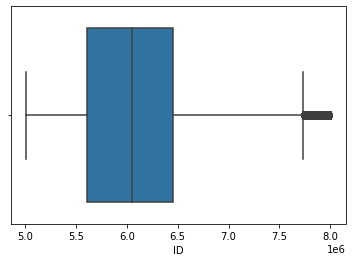

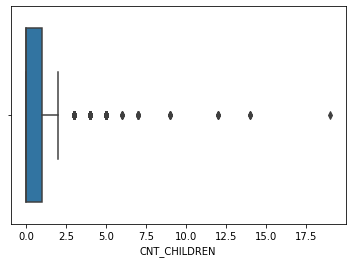

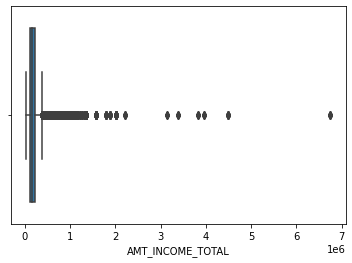

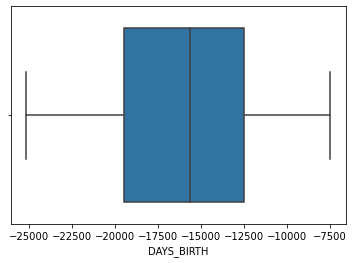

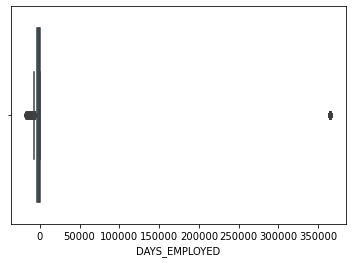

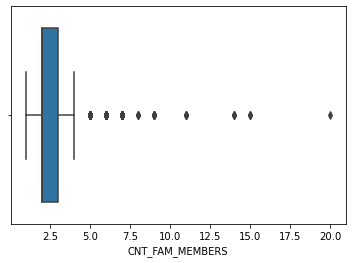

In [26]:
for col in data.columns:
    if data[col].dtype != 'object':
        sns.boxplot(data[col])
        plt.show()
        

# Remove outliyers

In [27]:
# FOR CNT_CHILDREN COLUMN
q_hi = data['CNT_CHILDREN'].quantile(0.999)
q_low = data['CNT_CHILDREN'].quantile(0.001)
data = data[(data['CNT_CHILDREN']>q_low) & (data['CNT_CHILDREN']<q_hi)]

In [28]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = data['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = data['AMT_INCOME_TOTAL'].quantile(0.001)
data= data[(data['AMT_INCOME_TOTAL']>q_low) & (data['AMT_INCOME_TOTAL']<q_hi)]

In [29]:
Days_emp_upper = data['DAYS_EMPLOYED'].quantile(0.999)
Days_emp_lower = data['DAYS_EMPLOYED'].quantile(0.005)
data= data[(data['DAYS_EMPLOYED']>Days_emp_lower) & (data['DAYS_EMPLOYED']<Days_emp_upper)]

In [30]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = data['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = data['CNT_FAM_MEMBERS'].quantile(0.001)
data= data[(data['CNT_FAM_MEMBERS']>q_low) & (data['CNT_FAM_MEMBERS']<q_hi)]

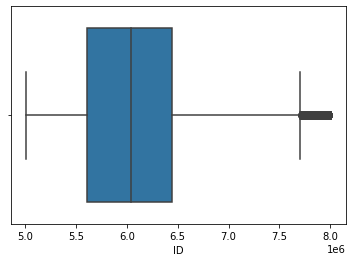

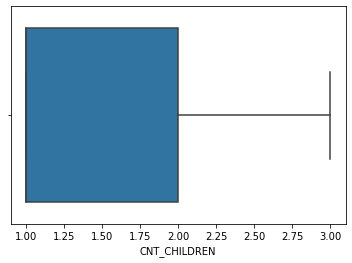

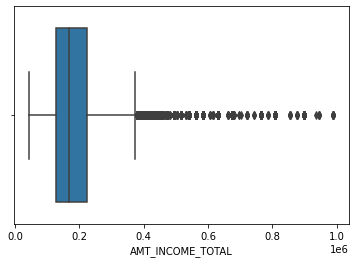

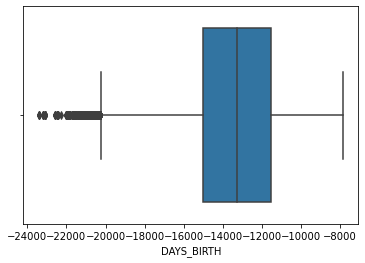

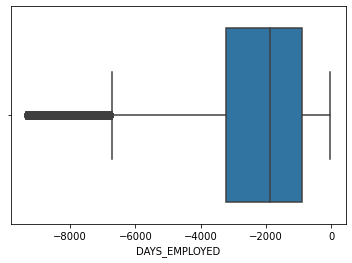

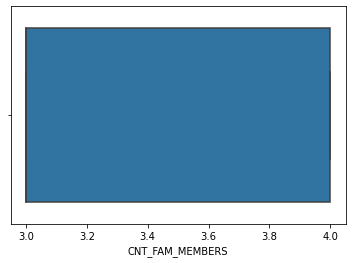

In [31]:
#After Removing Outliyers
for col in data.columns:
    if data[col].dtype != 'object':
        sns.boxplot(data[col])
        plt.show()
        

# Skewness

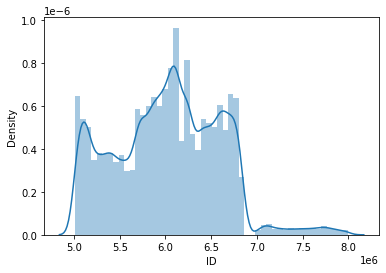

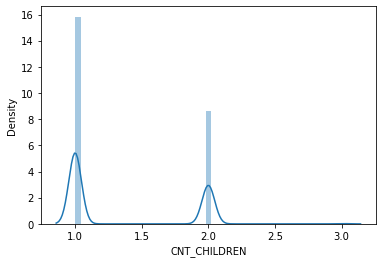

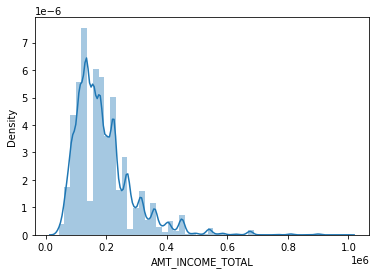

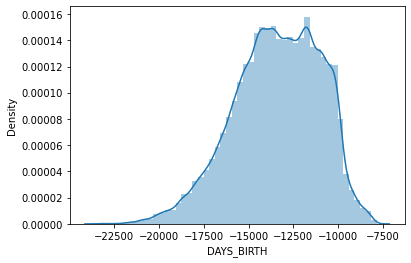

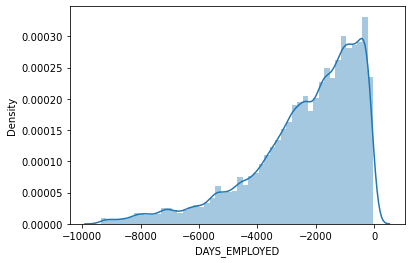

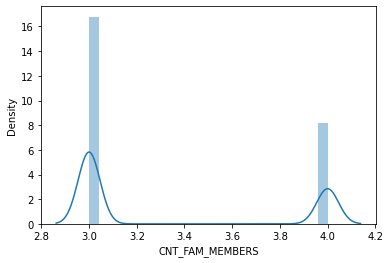

In [32]:
for col in data.columns:
    if data[col].dtype != 'object':
        sns.distplot(data[col])
        plt.show()

# Removing Skewness

In [33]:
data['AMT_INCOME_TOTAL'] =np.log(data['AMT_INCOME_TOTAL'])


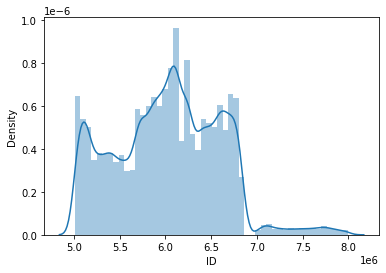

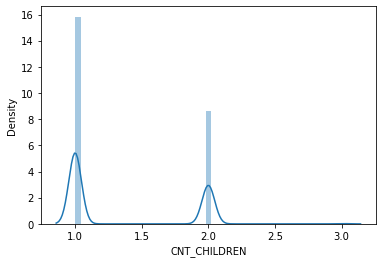

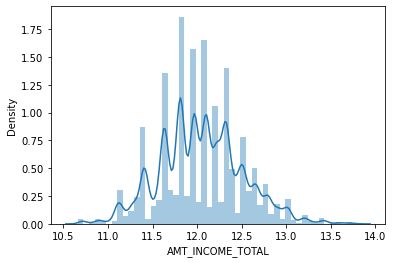

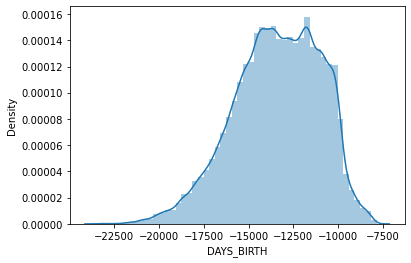

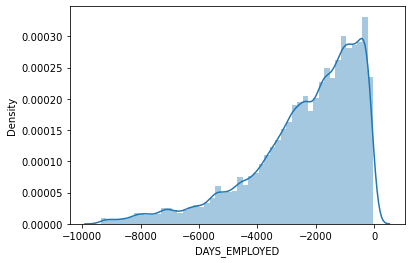

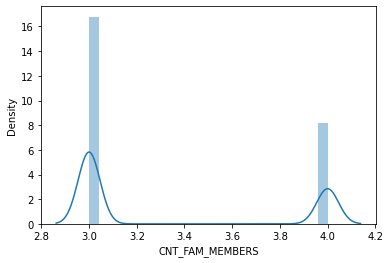

In [34]:
for col in data.columns:
    if data[col].dtype != 'object':
        sns.distplot(data[col])
        plt.show()

# Univarient ,BiVarient,MultiVarient

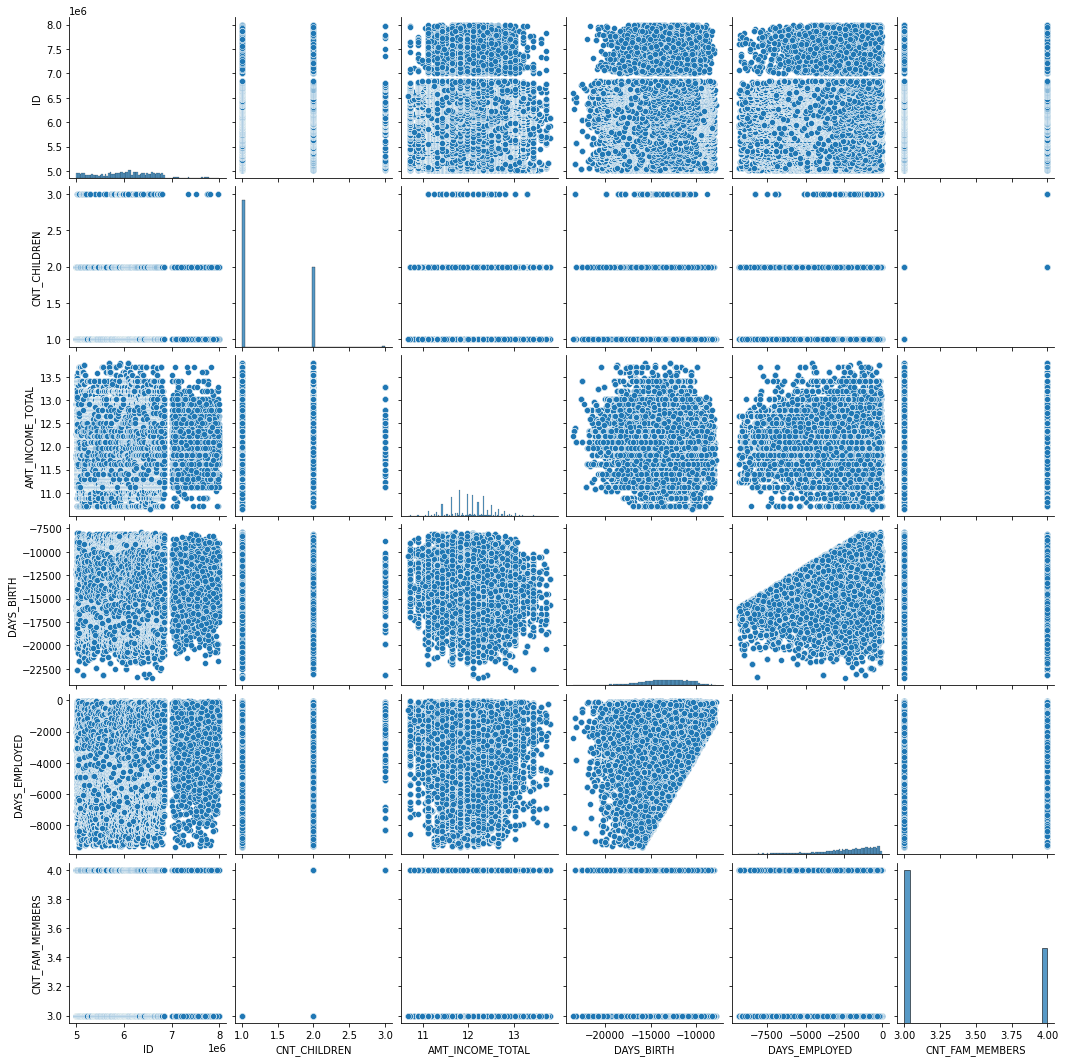

In [35]:
sns.pairplot(data)

# Data-Preprocessing 
## Convert Categorical to Numerical

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
lb = LabelEncoder()

In [38]:
for col in data.columns.values:
    if data[col].dtype == 'object':
        data[col] = lb.fit_transform(data[col])
data.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
29,5008838,1,0,1,1,12.911642,0,1,1,1,-11842,-2016,10,3.0
30,5008839,1,0,1,1,12.911642,0,1,1,1,-11842,-2016,10,3.0
31,5008840,1,0,1,1,12.911642,0,1,1,1,-11842,-2016,10,3.0
32,5008841,1,0,1,1,12.911642,0,1,1,1,-11842,-2016,10,3.0
33,5008842,1,0,1,1,12.911642,0,1,1,1,-11842,-2016,10,3.0
34,5008843,1,0,1,1,12.911642,0,1,1,1,-11842,-2016,10,3.0
46,5008854,0,1,1,2,11.813030,4,4,1,1,-15761,-3173,8,4.0
47,5008855,0,1,1,2,11.813030,4,4,1,1,-15761,-3173,8,4.0
48,5008856,0,1,1,2,11.813030,4,4,1,1,-15761,-3173,8,4.0
49,5008857,0,1,1,2,11.813030,4,4,1,1,-15761,-3173,8,4.0


In [39]:
o_he=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

In [40]:
data = pd.get_dummies(data, columns =o_he )
data


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_0,...,OCCUPATION_TYPE_8,OCCUPATION_TYPE_9,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17
29,5008838,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
30,5008839,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
31,5008840,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
32,5008841,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
33,5008842,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438536,6837264,0,0,0,2,11.407565,-16062,-1275,4.0,0,...,0,0,0,0,0,0,0,0,0,0
438539,6837454,1,1,1,1,11.995352,-10890,-2675,3.0,0,...,0,0,0,0,0,0,0,0,0,0
438542,6837905,1,1,1,1,12.780014,-15904,-2614,3.0,0,...,1,0,0,0,0,0,0,0,0,0
438543,6837906,1,1,1,1,12.780014,-15904,-2614,3.0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_0,...,OCCUPATION_TYPE_8,OCCUPATION_TYPE_9,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17
29,5008838,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
30,5008839,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
31,5008840,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
32,5008841,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
33,5008842,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0


In [42]:
data.shape

(111799, 48)

#                                 Now data form credit_Record

In [43]:
target = pd.read_csv('credit_record.csv')

In [44]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [45]:
target.MONTHS_BALANCE.unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64)

In [46]:
target['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
target['STATUS'] = target['STATUS'].astype('int')
target['STATUS'] = target['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [47]:
target['STATUS'].value_counts() 

0    1045471
1       3104
Name: STATUS, dtype: int64

In [48]:
target = target.groupby('ID').agg(max).reset_index()
target.tail()

,ID,MONTHS_BALANCE,STATUS
45980,5150482,-11,0
45981,5150483,0,0
45982,5150484,0,0
45983,5150485,0,0
45984,5150487,0,0


# Comaparing Row data and Target Data

In [49]:
final_data = data.join(target.set_index('ID'), on='ID', how='inner')

In [50]:
final_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_0,...,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17,MONTHS_BALANCE,STATUS
29,5008838,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,1,0,0,0,0,0,0,0,-9,0
30,5008839,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,1,0,0,0,0,0,0,0,0,0
31,5008840,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,1,0,0,0,0,0,0,0,0,0
32,5008841,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,1,0,0,0,0,0,0,0,0,0
33,5008842,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434779,5142964,1,0,0,1,12.100712,-10656,-926,3.0,0,...,0,0,0,0,0,0,0,0,0,1
434780,5142972,1,0,0,1,12.100712,-10656,-926,3.0,0,...,0,0,0,0,0,0,0,0,0,1
434782,5143342,1,0,0,1,12.283034,-12946,-2418,3.0,0,...,0,0,0,0,0,0,0,0,0,1
434791,5145846,0,0,1,1,12.454884,-17594,-1315,3.0,0,...,1,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

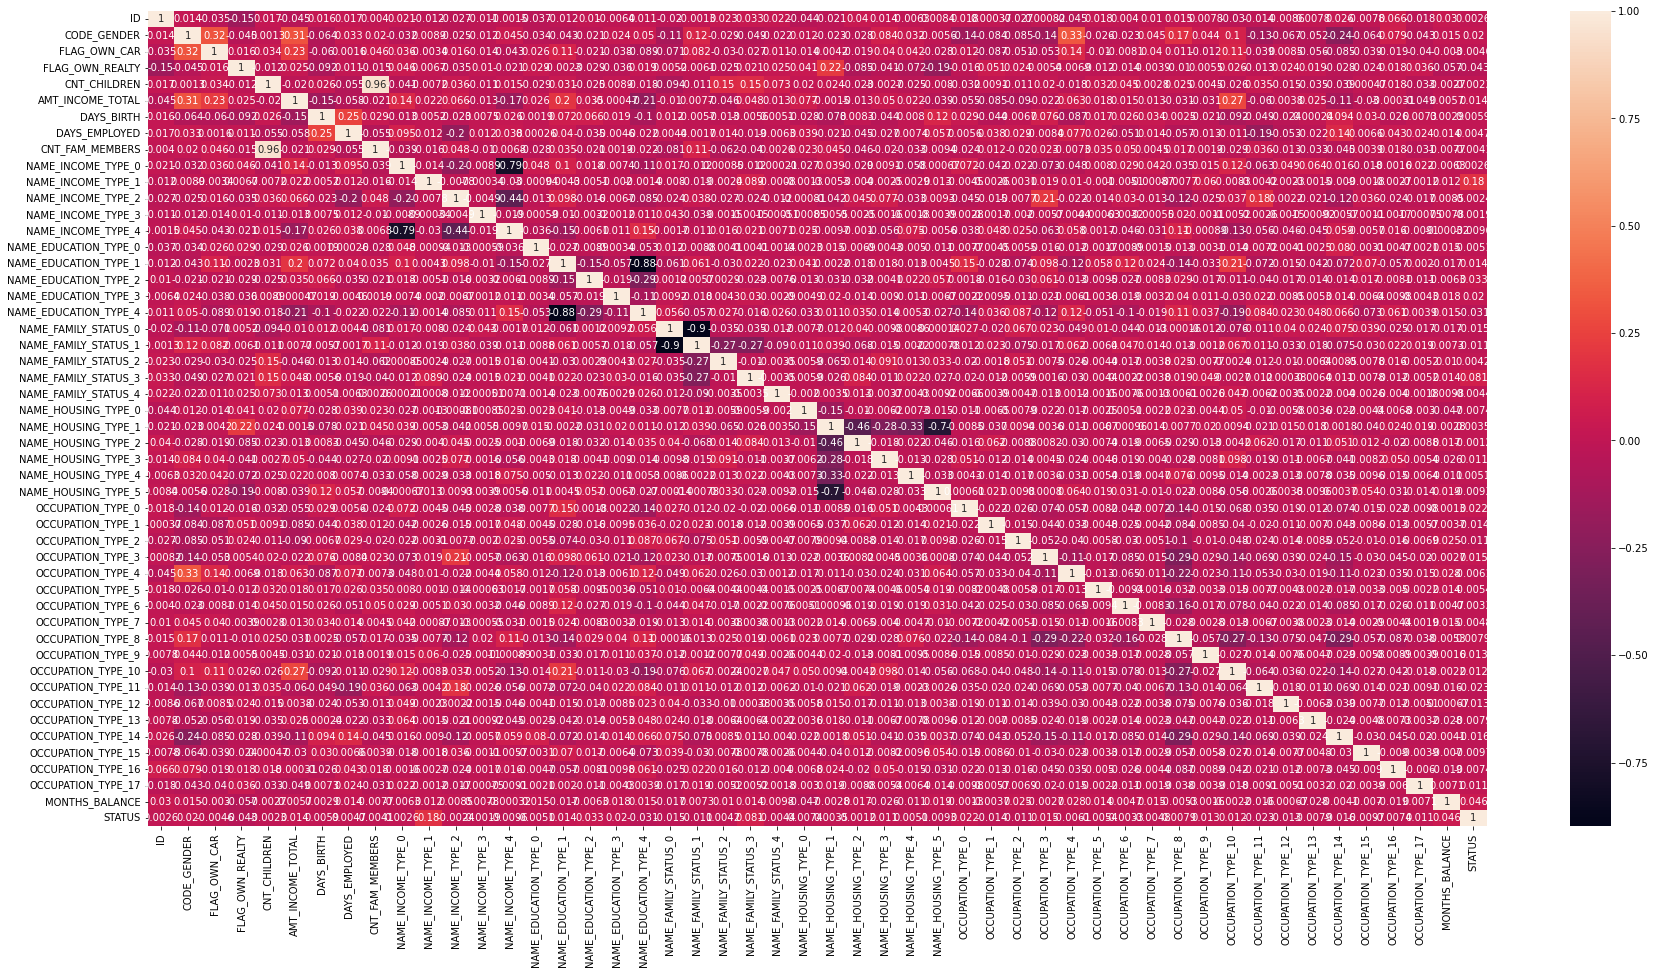

In [51]:
plt.figure(figsize=(30,15))
sns.heatmap(final_data.corr(),annot=True)

In [52]:
final_data.drop(['ID','CNT_CHILDREN','MONTHS_BALANCE'],axis=1,inplace=True)

<AxesSubplot:>

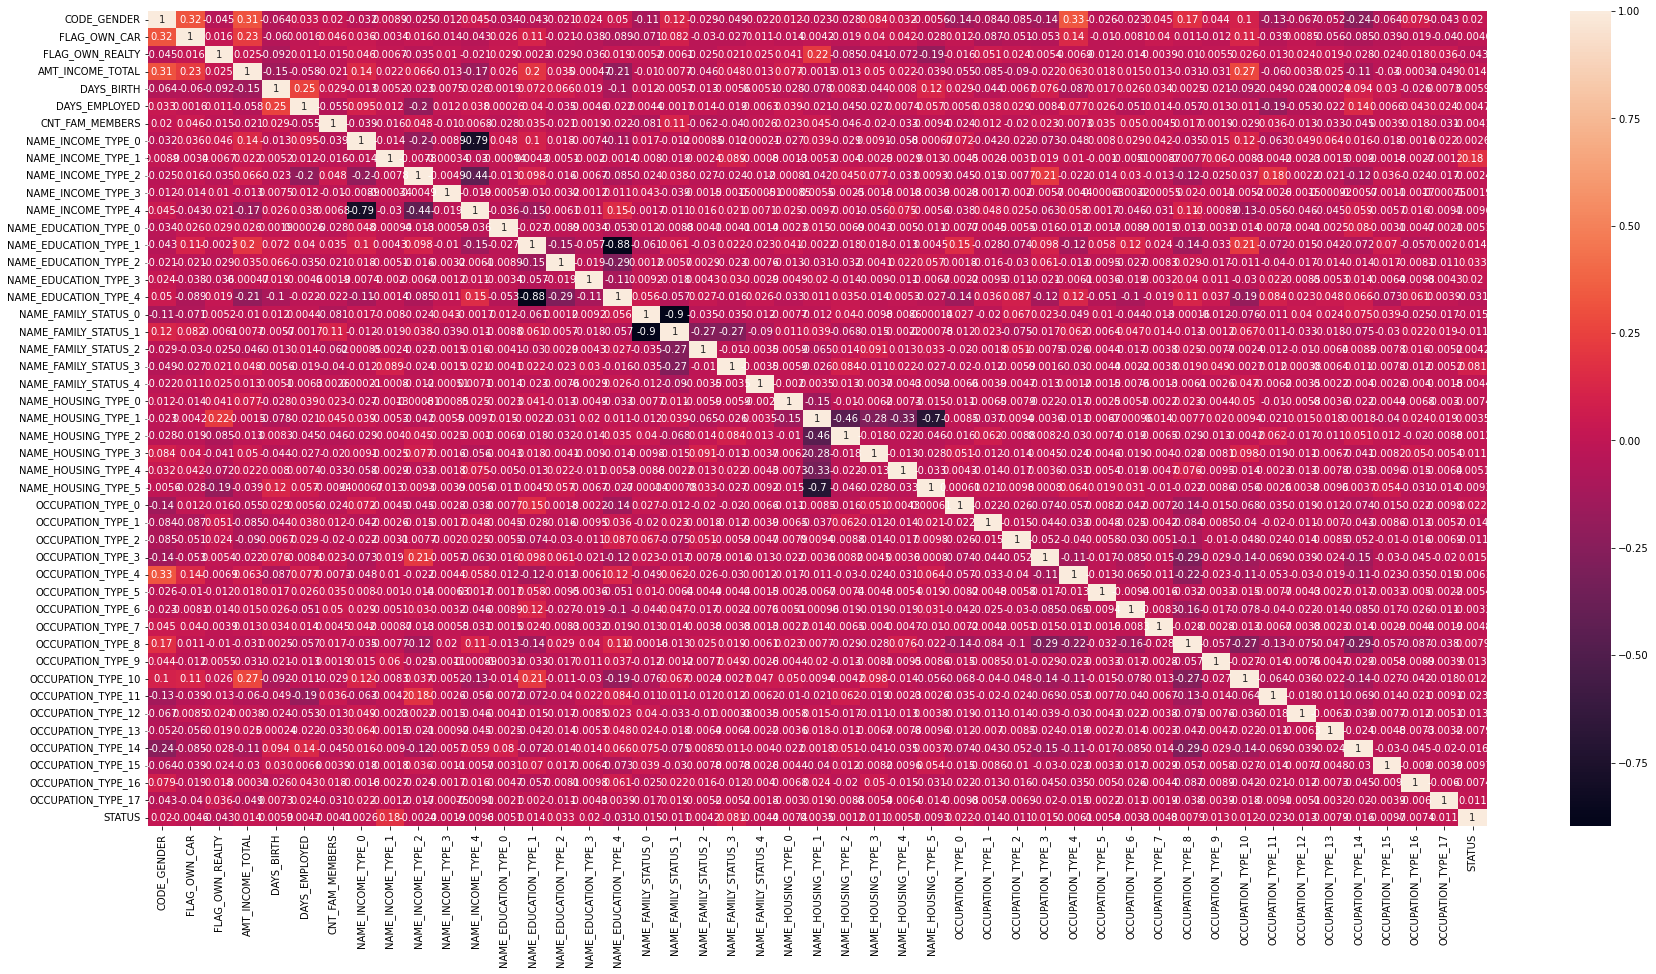

In [53]:
plt.figure(figsize=(30,15))
sns.heatmap(final_data.corr(),annot=True)

In [54]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_0,...,OCCUPATION_TYPE_8,OCCUPATION_TYPE_9,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17
29,5008838,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
30,5008839,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
31,5008840,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
32,5008841,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0
33,5008842,1,0,1,1,12.911642,-11842,-2016,3.0,1,...,0,0,1,0,0,0,0,0,0,0


# Seperating The into Independent and Dependent

In [55]:
x = final_data.iloc[:,:-1]
y=final_data.iloc[:,-1]
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,NAME_INCOME_TYPE_0,NAME_INCOME_TYPE_1,NAME_INCOME_TYPE_2,...,OCCUPATION_TYPE_8,OCCUPATION_TYPE_9,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17
29,1,0,1,12.911642,-11842,-2016,3.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
30,1,0,1,12.911642,-11842,-2016,3.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
31,1,0,1,12.911642,-11842,-2016,3.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
32,1,0,1,12.911642,-11842,-2016,3.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
33,1,0,1,12.911642,-11842,-2016,3.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434779,1,0,0,12.100712,-10656,-926,3.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
434780,1,0,0,12.100712,-10656,-926,3.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
434782,1,0,0,12.283034,-12946,-2418,3.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
434791,0,0,1,12.454884,-17594,-1315,3.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


# Splitting The Dataset

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=43)

# Scaling The Features

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_scaled = pd.DataFrame(mms.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(mms.transform(x_test), columns=x_test.columns)

In [59]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(x_train_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(x_test_scaled, y_test)
# we have addressed the issue of oversampling here

In [60]:
y_train.value_counts()

0    7287
1     121
Name: STATUS, dtype: int64

In [61]:
y_balanced.value_counts()

0    7287
1    7287
Name: STATUS, dtype: int64

In [62]:
y_test.value_counts()

0    1826
1      26
Name: STATUS, dtype: int64

In [63]:
y_test_balanced.value_counts()


0    1826
1    1826
Name: STATUS, dtype: int64

In [64]:
xfjyh

NameError: name 'xfjyh' is not defined

# Model Selection

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [66]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [67]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores) 

[0.6491011390146837, 0.9613695622341155, 0.9392754219843557, 0.994716618635927, 0.994716618635927, 0.9945107726087553]
[0.6664841182913472, 0.7943592552026287, 0.9153888280394304, 0.8118838992332968, 0.9164841182913472, 0.9737130339539978]


# PCA

In [68]:
from sklearn.decomposition import PCA

In [69]:
decomposition = PCA(n_components=2)
decomposition.fit(X_balanced)
x_train_pca =decomposition.transform(X_balanced)


decomposition.fit(X_test_balanced)
x_test_pca =decomposition.transform(X_test_balanced)

In [70]:
x_train_pca.shape

(14574, 2)

### After Pca

In [71]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [72]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train_pca, y_balanced)
    train_score = classifier.score(x_train_pca, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(x_test_pca, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores) 

[0.5848085631947303, 0.9125840537944284, 0.6524632907918211, 0.994716618635927, 0.994716618635927, 0.920749279538905]
[0.5903614457831325, 0.4816538882803943, 0.5095837897042717, 0.458105147864184, 0.49370208105147867, 0.4994523548740416]
